# 2) Finding the trend in a dataset by calculating a simple centred moving average

#### This example is for a non seasonal dataset, so $X_t = m_t + W_t$

In [1]:
# getting some warnings from matplotlib, so turning those warnings off
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# reading csv to dataframe
filename = './data/alltemps.csv'
df = pd.read_csv(filename)

In [3]:
# showing first few lines
# YEAR_ is a float (should be int) and DATE_ is a SPSS-variable I don't need
df.head(3)

,temperature,YEAR_,DATE_
0,8.830,1659.000,1659
1,9.080,1660.000,1660
2,9.750,1661.000,1661


In [4]:
# set year as index
df.set_index(df['YEAR_'].astype(int).rename('year'), inplace=True)

In [5]:
# delete unnecessary columns
del([df['DATE_'], df['YEAR_']])

In [6]:
# calculate simple moving averages that are centred
# in pandas you use the rolling() function followed by the mean() function
df['ma5'] = df.rolling(window=5, center=True).mean()
df['ma31'] = df['temperature'].rolling(window=31, center=True).mean()
df['ma50'] = df['temperature'].rolling(window=50, center=True).mean()

In [7]:
# show first few lines from dataset, now including the moving averages
df.head(5)

,temperature,ma5,ma31,ma50
year,,,,
1659,8.830,nan,nan,nan
1660,9.080,nan,nan,nan
1661,9.750,9.148,nan,nan
1662,9.500,9.248,nan,nan
1663,8.580,9.082,nan,nan


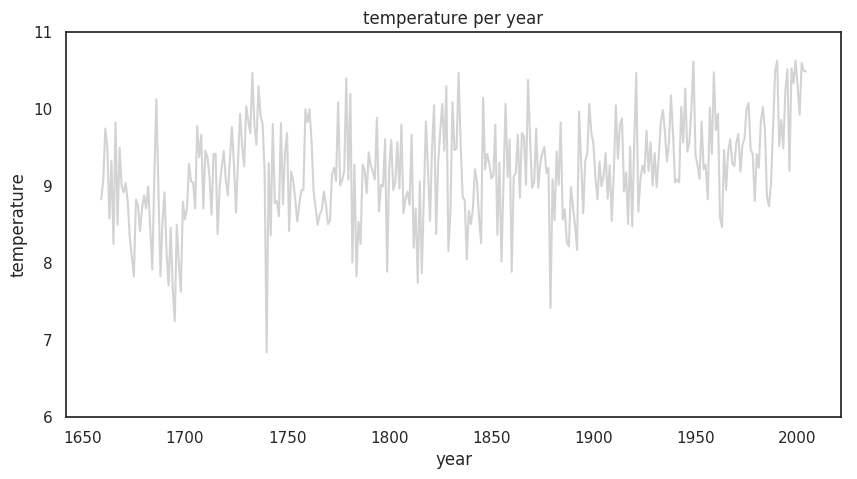

In [8]:
# plot the original temperature variable
# as you can see it's very irregular from year to year
ax = df['temperature'].plot(figsize=(10,5), ylim=(6,11), color='lightgrey')
ax.set(title='temperature per year', ylabel='temperature');

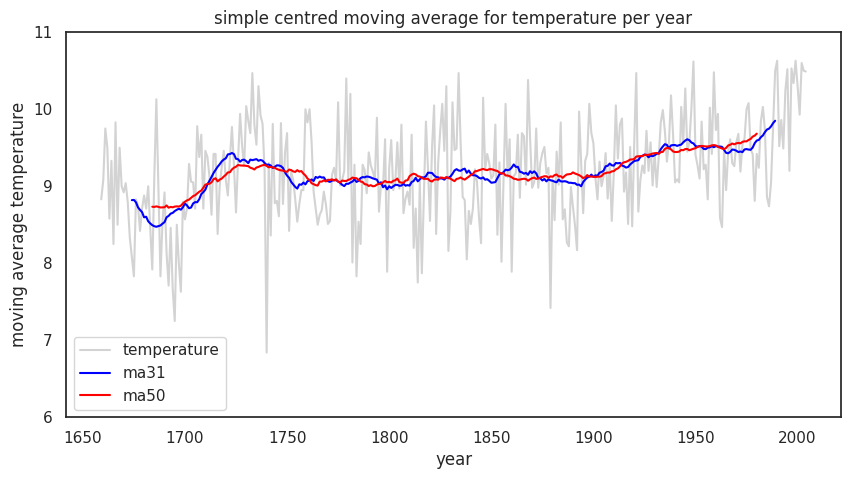

In [9]:
# you can choose to plot all lines (temperature and/or moving averages) together
# i've left out 'ma5' because it's still very irregular and undersmoothed
ax = df[['temperature', 'ma31', 'ma50']].plot(figsize=(10,5), ylim=(6,11), color=['lightgrey', 'blue', 'red'])
ax.set(title='simple centred moving average for temperature per year', ylabel='moving average temperature');

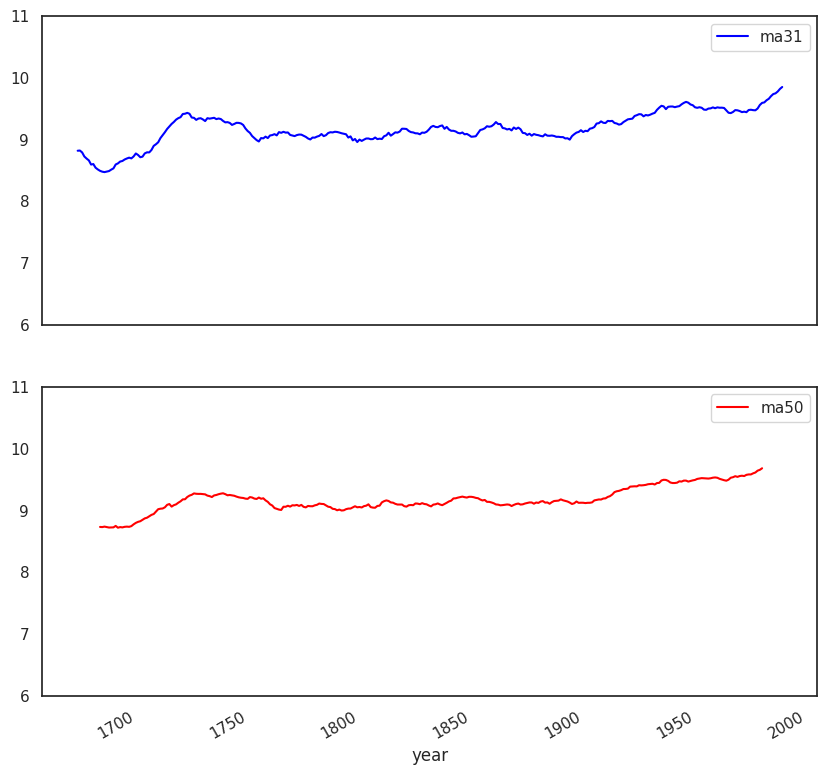

In [10]:
# or you could also choose to plot separate subplots for each variable with subplots=True
df[['ma31', 'ma50']].plot(
    subplots=True, 
    sharey=True, 
    figsize=(10,10), 
    ylim=(6,11),
    color=['blue', 'red']
);